In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


In [2]:
##reading files
rider_provider='AutoData.csv'
data=pd.read_csv(rider_provider)

In [3]:
data.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.shape

(205, 25)

In [5]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

#Accourding to the information recruited the observations are:
    #1>the kind of data we are woking with,
    #2>what are the number of rows and columns,
    #3>The result below makes it evident that we do not have any null values present in the data

In [7]:
data.symboling.astype('category').value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

thus accourding to the output we can say that cars have a comparatively high risk factor associated with them

In [8]:
data.carbody.astype('category').value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

## PLOTTING THE PRICE STRUCTURE GRAPH TO UNDERSTAND THE RANGE OF PRICE ENGAGEMENT OF THE PEOPLES

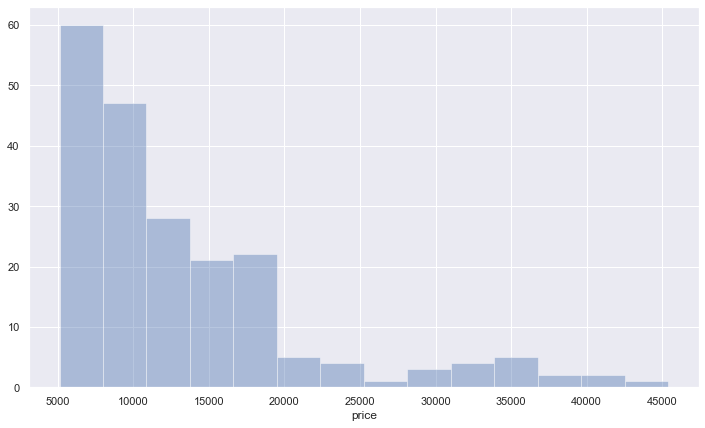

In [9]:
sns.set()
fig, ax= plt.subplots(1,figsize=(12,7))
sns.distplot(data.price, norm_hist=False, kde=False)

#Accourding to the graph above, most of the cars lie in the range of 5000 to 20000.
#Showing that the company should be targetting the middle class peoples to increase the sales as a very few cas lie in the higher ranges.

## Analysing the distribution of the horsepower across the cars

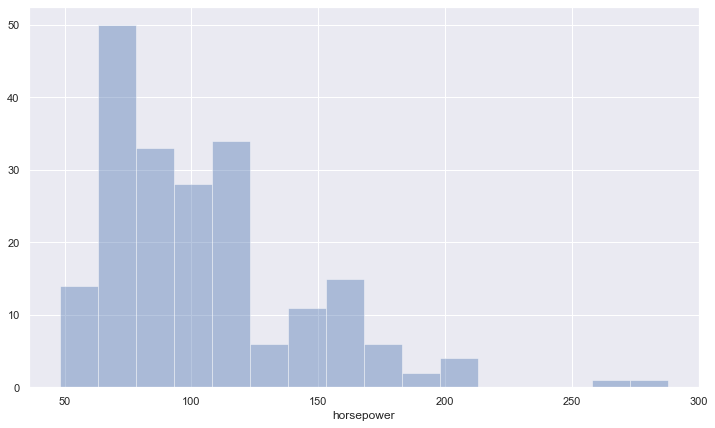

In [10]:
sns.set()
fig, ax= plt.subplots(1,figsize=(12,7))
sns.distplot(data.horsepower, norm_hist=False, kde=False)

 Most of the cars in the data have horespowe distributed in 50 to 150  range.

# DATA CLEANING

In [11]:
data['make'].value_counts()

toyota corolla             6
peugeot 504                6
toyota corona              6
subaru dl                  4
mazda 626                  3
                          ..
volkswagen model 111       1
subaru r1                  1
volkswagen super beetle    1
honda accord cvcc          1
Nissan versa               1
Name: make, Length: 147, dtype: int64

## Simple Linear Regression Model: I WILL SAY PIKACHU MODEL

CREATING CORELATION MATRIX TO DECIDE WHAT TO GO WITH

In [12]:
data.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


As we can observe from the chart, the variable that correlates the most with price is the engine-size as it has the highest correlation value with price.

So, now i will be using it for simple linear regression.

# PIKACHU MODEL

In [13]:
A=data['enginesize']
B=data['price']

SPLITING TEST TEAIN DATASET

In [14]:
A_train,A_test,B_train,B_test=train_test_split(A,B,random_state =31)

In [15]:
A_train.head()

88     110
74     304
189    109
173    122
48     258
Name: enginesize, dtype: int64

In [16]:
A_train = A_train.values.reshape(-1,1)
A_test = A_test.values.reshape(-1,1)

B_train = B_train.values.reshape(-1,1)
B_test = B_test.values.reshape(-1,1)

In [17]:
reg= LinearRegression()
reg.fit(A_train,B_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print(reg.intercept_)
print(reg.coef_)

[-8008.74723113]
[[167.29904396]]


#THUS THE LINEAR LINE EQUATION IS Y=MX+C
#THUS y=167x+(-8008) equation of linear line.
#with M=167(APPROX)
#AND  C=-8008(APPROX)

R VALUE FOR PIKACHU MODEL WHILE TRAINING:
0.7707390596714485


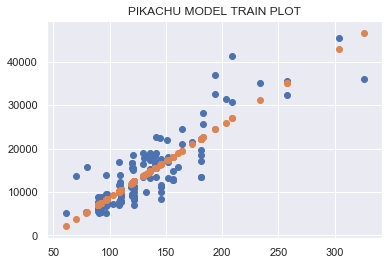

In [19]:
#This is the R2 Score of the test data set 

B_pred_train=reg.predict(A_train)

print("R VALUE FOR PIKACHU MODEL WHILE TRAINING:")
print(r2_score(B_train,B_pred_train))
#Plotting scatter graph 
plt.scatter(x = A_train,y= B_train)
plt.scatter(x=A_train,y= B_pred_train)
plt.title("PIKACHU MODEL TRAIN PLOT")
plt.show()

R VALUE FOR PIKACHU MODEL WHILE TESTING:
0.7454896900864271


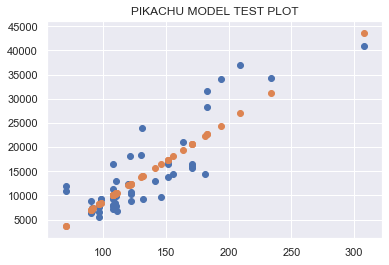

In [20]:
# Build model using best variable and report the R2
#This is the R2 Score of the train data set 
B_test_pred=reg.predict(A_test)
print("R VALUE FOR PIKACHU MODEL WHILE TESTING:")
print(r2_score(B_test,B_test_pred))

plt.scatter(x = A_test,y= B_test)
plt.scatter(x=A_test,y= B_test_pred) 
plt.title("PIKACHU MODEL TEST PLOT")
plt.show()

there is alot of outliers in  here but we can always make use of r2 square

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

NOW GOING FOR THE MULTIPLE REGRESSION MODEL AS THERE WERE A LOT OF OUTLIERS AND THE MODEL WASNT PERFECT FOR LINEAR REGRESSION

# MULTIPLE REGRESSION MODEL:I WILL CALL IT DRAKULLA MODEL

In [22]:
#  1 Applying the feature selection approaches as discussed in the class:

In [23]:
#using get_dummies fuction as it will convert catagorical variables as understoodable and numerical
data_carbody =pd.get_dummies(data.carbody)
data_carbody

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
200,0,0,0,1,0
201,0,0,0,1,0
202,0,0,0,1,0
203,0,0,0,1,0


In [24]:
# We will need N-1 dummies

data_carbody =pd.get_dummies(data.carbody,prefix='body',drop_first=True,)
data_carbody

,body_hardtop,body_hatchback,body_sedan,body_wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
200,0,0,1,0
201,0,0,1,0
202,0,0,1,0
203,0,0,1,0


In [25]:
# Creating a Heat Map to get the correlation measure between the variables:

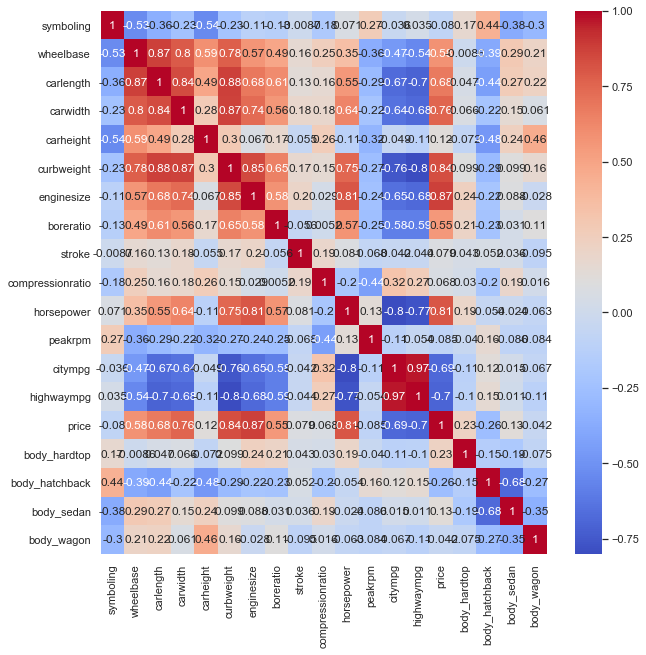

In [26]:
data_sample =pd.concat([data,data_carbody],axis=1)
correlation=data_sample.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap = 'coolwarm')
plt.show()

In [27]:
data_sample.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,body_hardtop,body_hatchback,body_sedan,body_wagon
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,9.0,111,5000,21,27,13495.0,0,0,0,0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,9.0,111,5000,21,27,16500.0,0,0,0,0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,9.0,154,5000,19,26,16500.0,0,1,0,0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,10.0,102,5500,24,30,13950.0,0,0,1,0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,8.0,115,5500,18,22,17450.0,0,0,1,0


In [28]:
# The categorical Data is not needed, so dropping all of it as follows:
data_sample = data_sample.drop('symboling', axis=1)
data_sample = data_sample.drop('fueltype', axis=1)
data_sample = data_sample.drop('aspiration', axis=1)
data_sample = data_sample.drop('doornumber', axis=1)
data_sample = data_sample.drop('carbody', axis=1)
data_sample = data_sample.drop('drivewheel', axis=1)
data_sample = data_sample.drop('enginelocation', axis=1)
data_sample = data_sample.drop('cylindernumber', axis=1)
data_sample = data_sample.drop('fuelsystem', axis=1)
data_sample = data_sample.drop('enginetype', axis=1)
data_sample=data_sample.drop('make',axis=1)

In [29]:
data_sample.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,body_hardtop,body_hatchback,body_sedan,body_wagon
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0


In [30]:
#dependent and independent variables for multiple regression

In [31]:
X=data_sample.drop(columns=['price'])
y=data_sample.price

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state =31)
reg= LinearRegression()
reg.fit(X_train,y_train)
multi_model = LinearRegression()
multi_model.fit (X_train,y_train)
#print(multi_model.intercept_)
#print(multi_model.coef_)

y_pred_train =multi_model.predict(X_train)

y_pred_test =multi_model.predict(X_test)


print("Mean-Squared-Error of DRAKULA MODEL on training data:{}".format(mean_squared_error(y_train,y_pred_train)))
print("R-sqaure of DRAKULA MODEL on training data: {}".format(r2_score(y_train, y_pred_train)))

print("Mean-Squared-Error of DRAKULA MODEL on test data:{}".format(mean_squared_error(y_test,y_pred_test)))
print("R-sqaure of DRAKULA MODEL on test data: {}".format(r2_score(y_test, y_pred_test)))


Mean-Squared-Error of DRAKULA MODEL on training data:8031946.2091677515
R-sqaure of DRAKULA MODEL on training data: 0.8672189034770796
Mean-Squared-Error of DRAKULA MODEL on test data:10441237.230651231
R-sqaure of DRAKULA MODEL on test data: 0.8545114970715074


# ACCOURDING TO THE MODELS R VALUES FOR 
#PIKACHU MODEL WHILE TRAINING: 0.7707390596714485
#PIKACHU MODEL WHILE TRAINING: 0.7707390596714485

#DRAKULA MODEL on training data: 0.8672189034770796
#DRAKULA MODEL on test data: 0.8545114970715074

# FROM THE R VALUES OF BOTH THE MODEL IT IS CLEAR THAT DRAKULA MODEL i.e MULTIPLE REGRESSION MODEL IS CLEARLY BETTER.

# THUS WE CAN NOW FINALLY STATE THAT THE PRICE OF THE CAR IS NOT JUST DEPENDING ON ONE INDEPENDENT VARIABLE IT'S LINEARLY DEPENDENT TO MULTIPLE INDEPENDENT VARIABLES